In [23]:

import skimage as ski
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt
from pyimzml.ImzMLParser import ImzMLParser
from skimage.filters import threshold_otsu
from skimage.filters import try_all_threshold


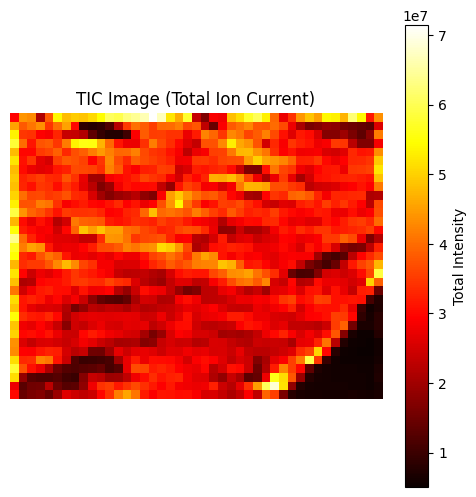

In [16]:
# take tic image from the before processing imzml
# Load data
parser = ImzMLParser("/storage/research/igmp_grp_perren/raw_data_DESI_imaging/PanNET_Umara/imzML/negative_mode/010622_B11965_TN_Analyte_1_CLMC_1.imzML")

# Get max dimensions from coordinates
coordinates = np.array(parser.coordinates)
x_max = coordinates[:, 0].max()
y_max = coordinates[:, 1].max()

# Initialize empty TIC image
tic_image = np.zeros((y_max, x_max))

# Sum all intensities for each pixel
for i, (x, y, z) in enumerate(parser.coordinates):
    _, intensities = parser.getspectrum(i)
    tic = np.sum(intensities)
    tic_image[y - 1, x - 1] = tic  # Convert 1-based to 0-based

# Plot the TIC image
plt.figure(figsize=(6, 6))
plt.imshow(tic_image, cmap="hot")
plt.title("TIC Image (Total Ion Current)")
plt.axis("off")
plt.colorbar(label="Total Intensity")
plt.show()

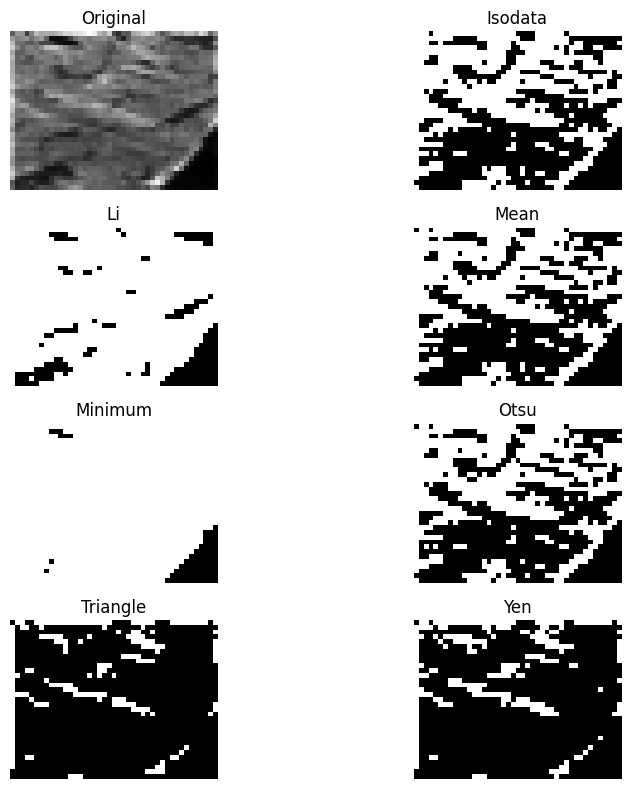

In [25]:
# separate foreground and background
# Load imzML
parser = ImzMLParser("/storage/research/igmp_grp_perren/raw_data_DESI_imaging/PanNET_Umara/imzML/negative_mode/010622_B11965_TN_Analyte_1_CLMC_1.imzML")

# Get image size
coordinates = np.array(parser.coordinates)
x_max = coordinates[:, 0].max()
y_max = coordinates[:, 1].max()
tic_image = np.zeros((y_max, x_max))

# Generate TIC image
for i, (x, y, z) in enumerate(parser.coordinates):
    _, intensities = parser.getspectrum(i)
    tic = np.sum(intensities)
    tic_image[y - 1, x - 1] = tic

# segment foreground vs background
threshold = threshold_otsu(tic_image)
fig, ax = try_all_threshold(tic_image, figsize=(10, 8), verbose=False)
plt.show()


In [ ]:
# separate foreground and background
# Load imzML
parser = ImzMLParser("/storage/research/igmp_grp_perren/raw_data_DESI_imaging/PanNET_Umara/imzML/negative_mode/010622_B11965_TN_Analyte_1_CLMC_1.imzML")

# Get image size
coordinates = np.array(parser.coordinates)
x_max = coordinates[:, 0].max()
y_max = coordinates[:, 1].max()
tic_image = np.zeros((y_max, x_max))

# Generate TIC image
for i, (x, y, z) in enumerate(parser.coordinates):
    _, intensities = parser.getspectrum(i)
    tic = np.sum(intensities)
    tic_image[y - 1, x - 1] = tic

# segment foreground vs background
threshold = threshold_otsu(tic_image)
binary_mask = tic_image > threshold

# Plot original TIC image and Otsu segmentation
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(tic_image, cmap='hot')
axs[0].set_title("TIC Image")
axs[0].axis("off")

axs[1].imshow(binary_mask, cmap='gray')
axs[1].set_title(f"Otsu Thresholded (T = {threshold:.2f})")
axs[1].axis("off")
